In [3]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [5]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [6]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

### Stop Words

In [7]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [8]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

In [9]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [10]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [11]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

## N그램

In [12]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [13]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

## 빈도수

In [14]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [15]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3], dtype=int64)

### TF-IDF
- 이 단어가 이 문서에 쓰인 비율이 얼마일까

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

### Hashing Trick

In [17]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [18]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

Wall time: 7.6 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)

In [20]:
%time hv.transform(twenty.data)

Wall time: 2.96 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

### 예시

In [21]:
import warnings
warnings.simplefilter("ignore")

import json
import string
from urllib.request import urlopen
from konlpy.utils import pprint
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())

cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [
    w for w in hannanum.nouns(" ".join(cell)) 
    if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))
]

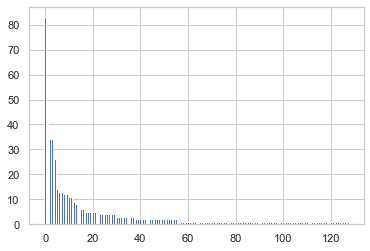

In [22]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [23]:
pprint(list(zip(feature_name, count))[:10])

[('컨테이너', 83),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 34),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('다음', 12),
 ('삭제', 12)]


### Gensim 실습

In [24]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [25]:
token_list = [[text for text in doc.split()] for doc in corpus]
token_list

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'document?']]

In [26]:
from gensim.corpora import Dictionary
dictionary = Dictionary(token_list)
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'last': 13}

In [28]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1), (4, 1), (5, 2)],
 [(4, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (4, 1), (9, 1), (10, 1), (11, 1)],
 [(10, 1), (12, 1), (13, 1)]]

In [29]:
# TF-ITF 인코딩
from gensim.models import TfidfModel
tfidf = TfidfModel(term_matrix)
for doc in tfidf[term_matrix]:
    print("doc:")
    for k, v in doc:
        print(k,v)

doc:
0 0.49633406058198626
1 0.49633406058198626
2 0.49633406058198626
3 0.49633406058198626
4 0.12087183801361165
doc:
0 0.25482305694621393
1 0.25482305694621393
3 0.25482305694621393
4 0.0620568558708622
5 0.8951785160431313
doc:
4 0.07979258234193365
6 0.5755093812740171
7 0.5755093812740171
8 0.5755093812740171
doc:
2 0.3485847413542797
4 0.08489056411237639
9 0.6122789185961829
10 0.3485847413542797
11 0.6122789185961829
doc:
10 0.37344696513776354
12 0.6559486886294514
13 0.6559486886294514


### step1 : 텍스트 데이터 다운로드

In [30]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(
categories=["comp.graphics", "rec.sport.baseball", "sci.med"])

In [33]:
%%time
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0] for t in doc if t[1].startswith("N")] for doc in tagged_list]

Wall time: 28.4 s


In [34]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
nouns_list = [[lm.lemmatize(w,pos="n") for w in doc] for doc in nouns_list]

In [35]:
import re
token_list = [[text.lower() for text in doc] for doc in nouns_list]
token_list = [[re.sub(r"[^A-Za-z]+", '', word) for word in doc] for doc in token_list]

In [38]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words += ["", "subject", "article", "line", "year", "month", "address", "keyword", "msg"]

token_list = [[word for word in doc if (word not in stop_words) and (2 < len(word)<10)] for doc in token_list]

In [40]:
from gensim import corpora

dictionary = corpora.Dictionary(token_list)
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in token_list]

In [ ]:
%%time
from gensim.models.ldamodel import LdaModel

model = LdaModel(corpora=doc_term_matrix, id2word=dictionary, num_to)